In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\kaushal\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\kaushal\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('goog.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


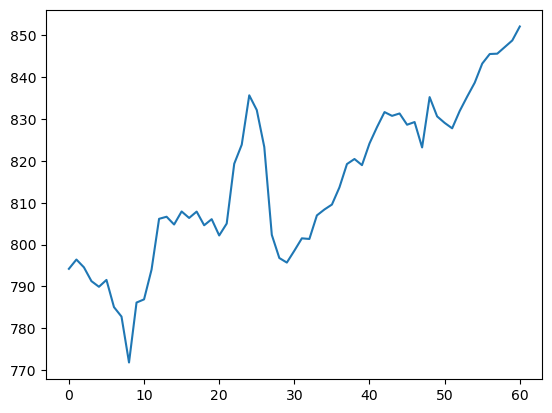

In [3]:
plt.plot(df['Close'])

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_norm = sc.fit_transform(np.array(df['Close']).reshape(-1,1))

In [5]:
training_size = int(len(df_norm)*0.8)
train_data, test_data = df_norm[:training_size, :], df_norm[training_size:, :]

In [6]:
train_data.shape, test_data.shape

((48, 1), (13, 1))

In [7]:
def myfunc(data, step = 5):
    x = []
    y = []
    for i in range(len(data)-step):
        x.append(data[i: i+step, 0])
        y.append(data[i+step, 0])
    return np.array(x), np.array(y)

x_train, y_train = myfunc(train_data)
x_test, y_test = myfunc(test_data)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(rate = 0.2))

model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(rate = 0.2))

model.add(LSTM(50, return_sequences=False))
# model.add(Dropout(rate = 0.2))

model.add(Dense(1))



C:\Users\kaushal\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.2619
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2154 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1841 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1502 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1179 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0818 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0491 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0308 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0517 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0354 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0282 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━

In [12]:
loss = model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step - loss: 0.0421


In [13]:
loss


0.04205581545829773

In [14]:
y_pred = sc.inverse_transform(model.predict(x_test))
y_test = sc.inverse_transform(np.array(y_test.reshape(-1, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  16.222358633789057
MSE:  271.17962460491265
RMSE:  16.467532438252935


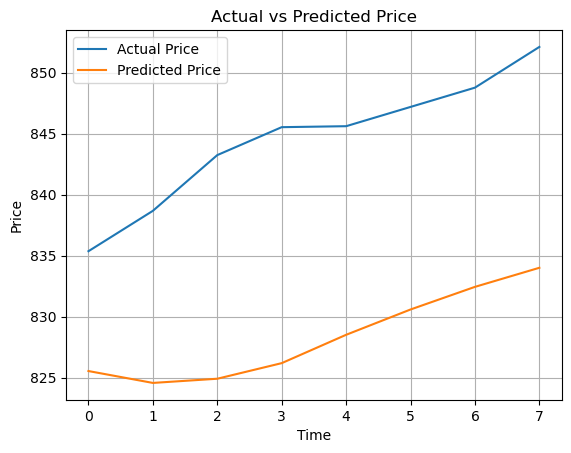

In [16]:
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()